In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv("Housing.csv")
print(data)

        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [3]:
price = data['price'].values.reshape(-1,1)

In [4]:
facility_data = data.iloc[:, 1:].to_numpy()
facility_data = np.where(facility_data == 'yes', 1, facility_data)
facility_data = np.where(facility_data == 'no', 0, facility_data)
facility_data = np.where(facility_data == 'furnished', 2, facility_data)
facility_data = np.where(facility_data == 'semi-furnished', 1, facility_data)
facility_data = np.where(facility_data == 'unfurnished', 0, facility_data)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(facility_data, price, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
iters = 1000
rate = 0.09

In [7]:
model = DecisionTreeRegressor(max_depth=10, random_state=42)
history = model.fit(X_train,y_train)

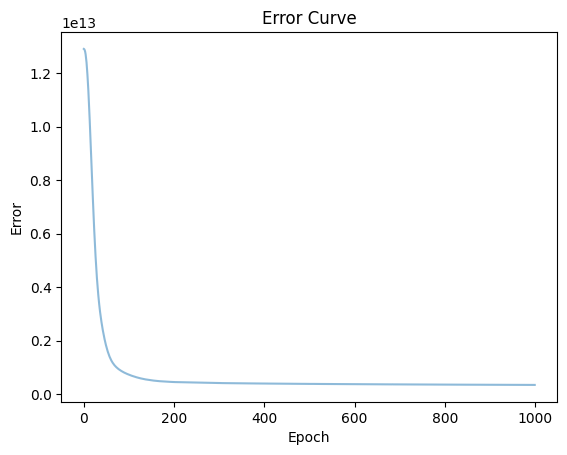

In [22]:
import matplotlib.pyplot as plt
#plt.scatter(range(1,iters+1), history.loss_curve_, alpha=0.5)
plt.plot(history.loss_curve_, alpha=0.5)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Curve')
plt.show()

In [8]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return np.mean((y - y_pred) ** 2)

mse_val = evaluate_model(model, X_val, y_val)
mse_test = evaluate_model(model, X_test, y_test)

print(f'Validation MSE: {mse_val**0.5:.4f}')
print(f'Test MSE: {mse_test**0.5:.4f}')

Validation MSE: 3210490.1943
Test MSE: 2798753.2423


In [9]:
mse_train = evaluate_model(model, X_train, y_train)
print(f'Training MSE: {mse_train**0.5:.4f}')

Training MSE: 2493845.9767


In [ ]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)
print(y_test)
print(y_test_pred)